# The problem: - COVID-19 Outcome Prediction
The data used in this project will help to identify whether a person is going to recover from coronavirus symptoms or not based on some pre-defined standard symptoms. 


## Team 2 member:-
-  1- Mahmoud Adel Khorshed
-  2- Mahmoud MOHAMED ABDELHAMIED abdien
-  3- Mahmoud Ahmed Mahmoud Habib




Copyrights 2022 Master of science - Queens University

# 1- Importing Libraries

In [28]:
#import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # statistical data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve
sns.set()

# 2- Loading Data

In [29]:
#Load Data
data= pd.read_csv("data.csv",index_col=0)
data.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# 3- Describing Data

In [30]:
# view dimensions of dataset
data.shape

(863, 14)

In [31]:
data[['result']].value_counts()

result
0         755
1         108
dtype: int64

we notice that the class label is highly unbalanced it will result the spliting to be unfair for both classes require us to either .

- increase the wieght of class 1 (it's the label we are intrested in the most).

- split the data evenly between both labels (startified KFOLD would be most suitable also for the lack of data)
- todo # docs for kfold and splitting methods.

-Weighted models (Weighted Logistic Regression - Naive Bayes priors)

In [32]:
data.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


### To do 
-Describe each column in the data and explore the values of mean and skewers .

-highlight that the data is baised in one value for all symptoms.

-provide reason for creating dummies 

###  Before implementing our models , We provide some insights and visualization that would help us understand the data and what we should expect from our models.

# 4- Visualizing Data

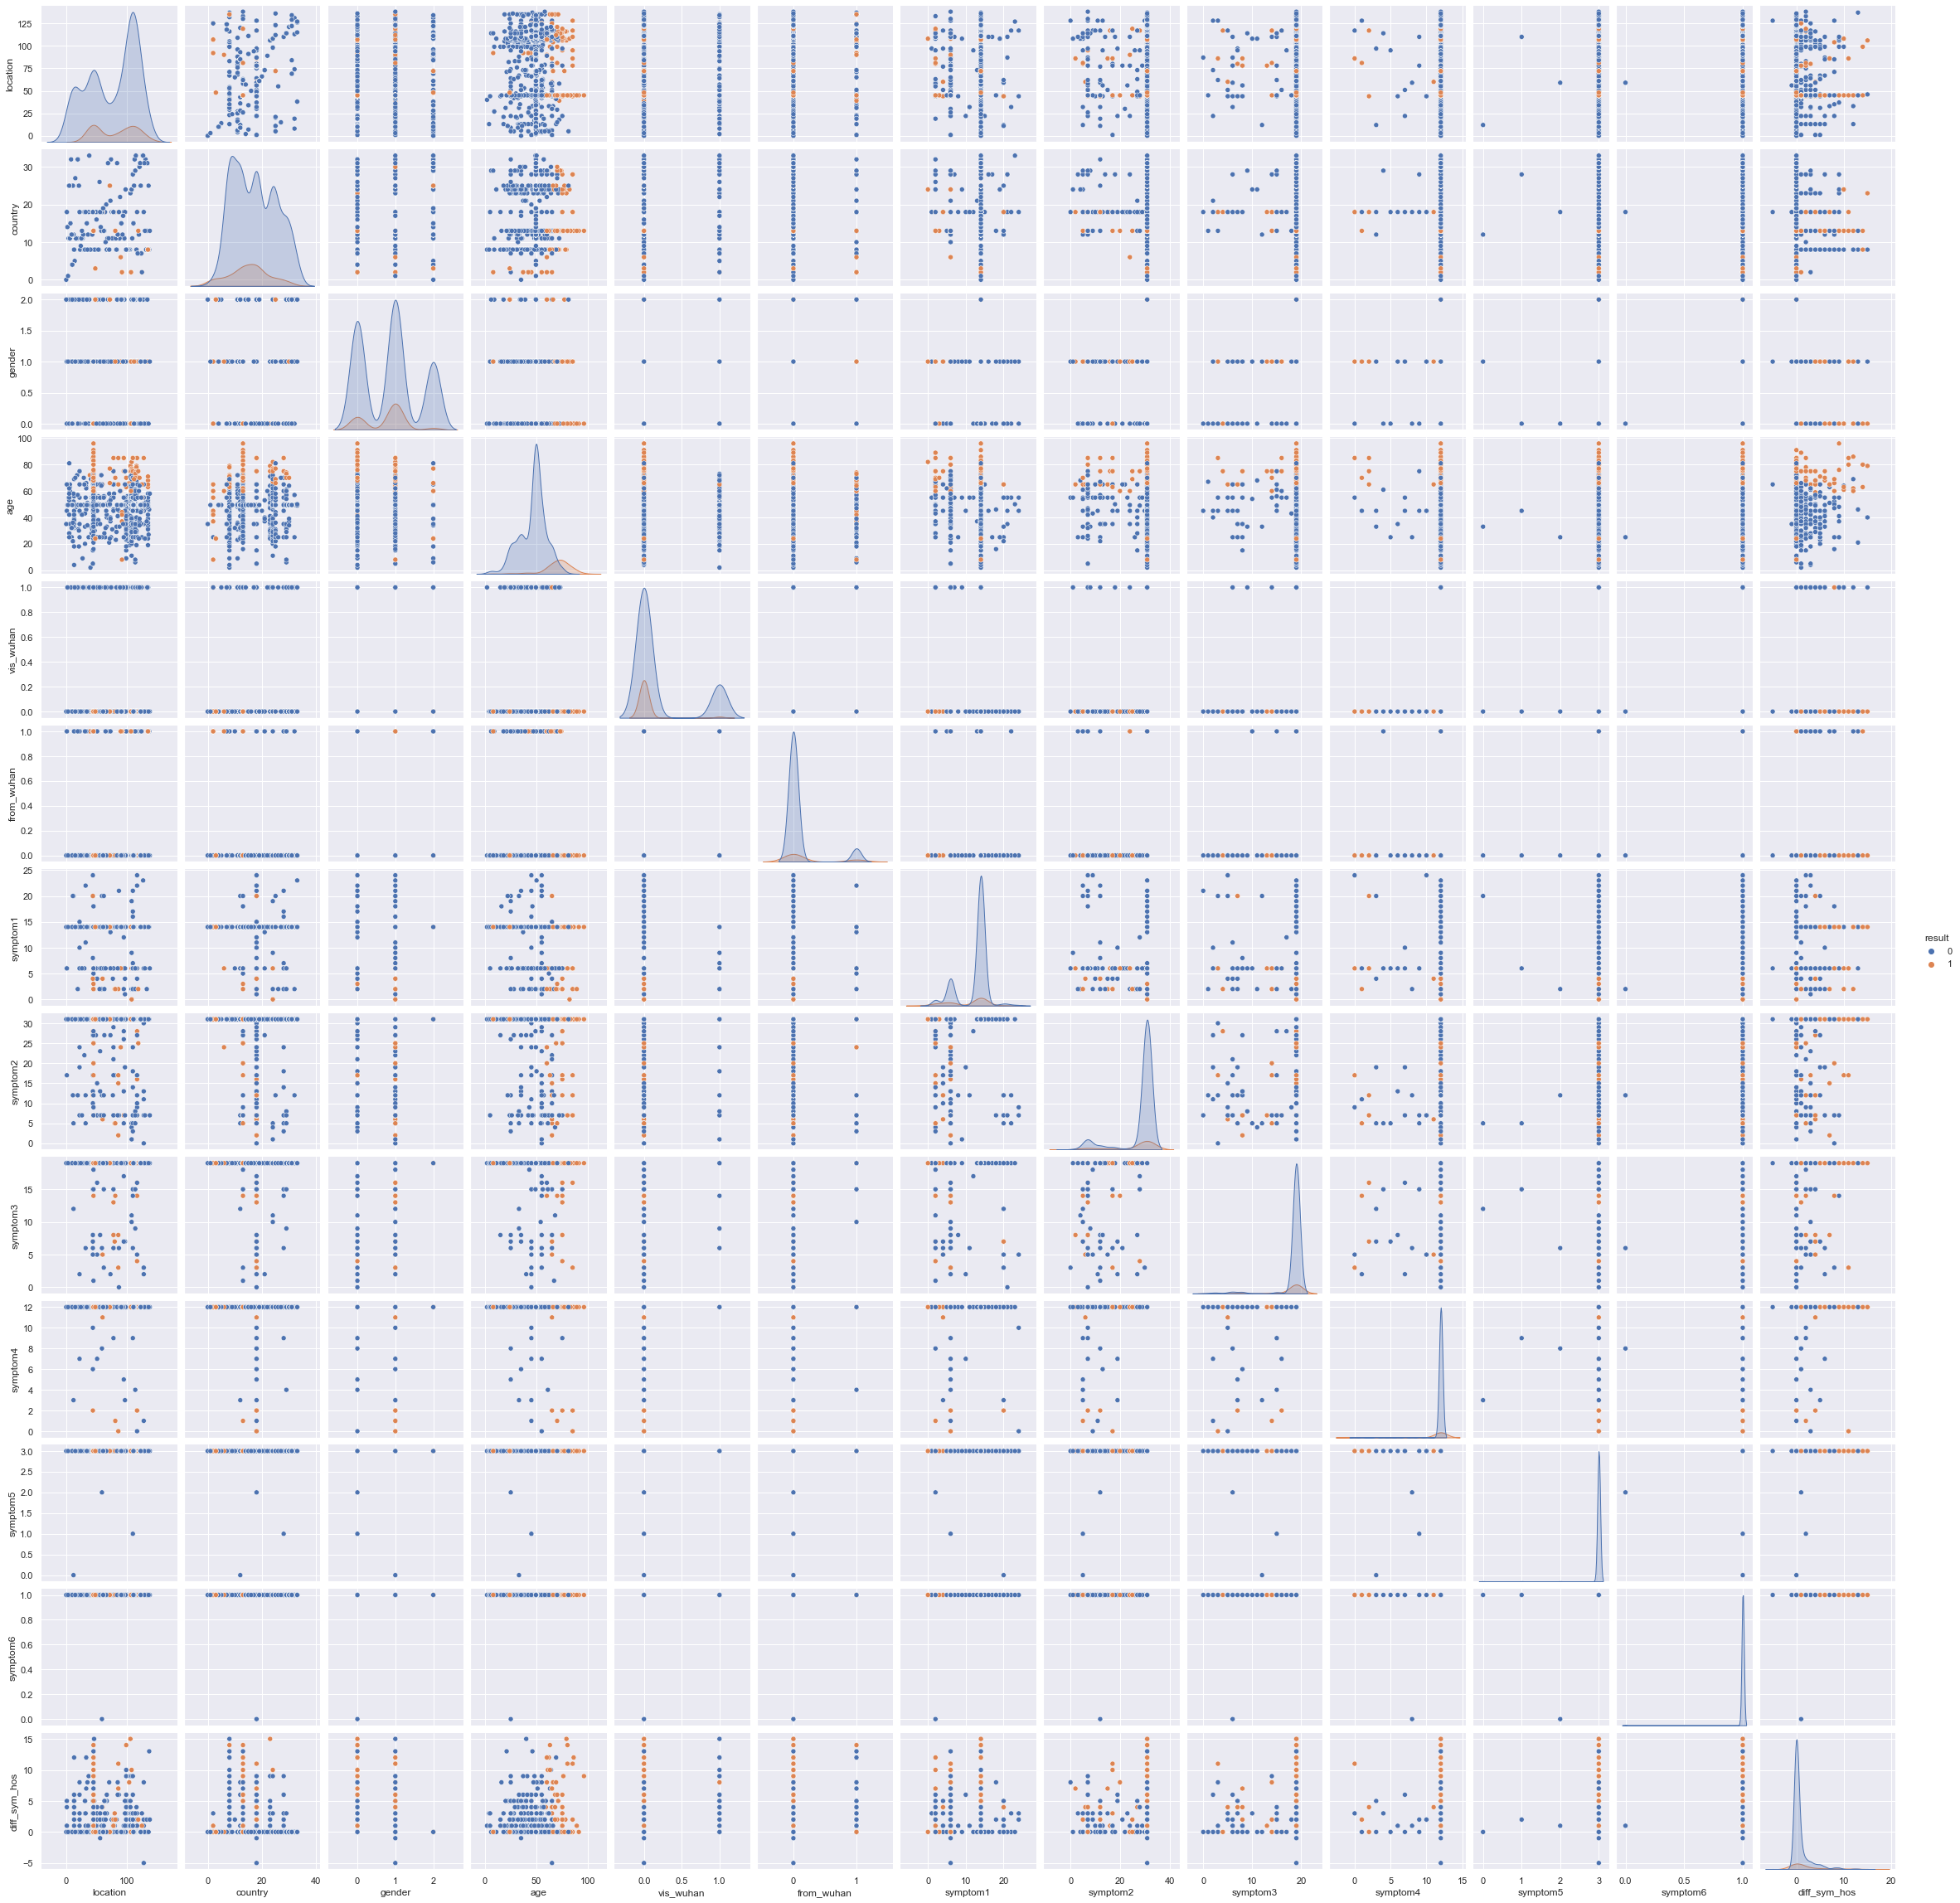

In [33]:
sns.pairplot(data=data,hue='result')

state that the labels can hardly be seperabale (both lables share alot values ) in all features except for age 
we need to further explore correlation 

Text(0.5, 1.0, 'Correlation Matrix')

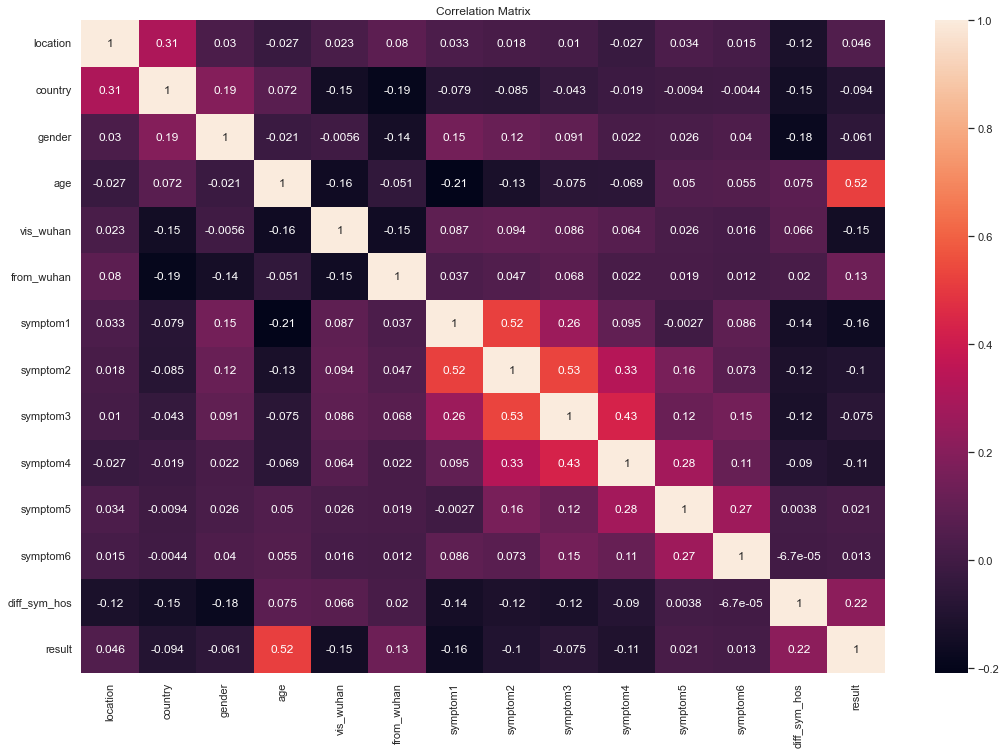

In [34]:
plt.rcParams["figure.figsize"] = (18,12) # Custom figure size in inches
sns.heatmap(data.corr(), annot =True)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'Correlation Matrix')

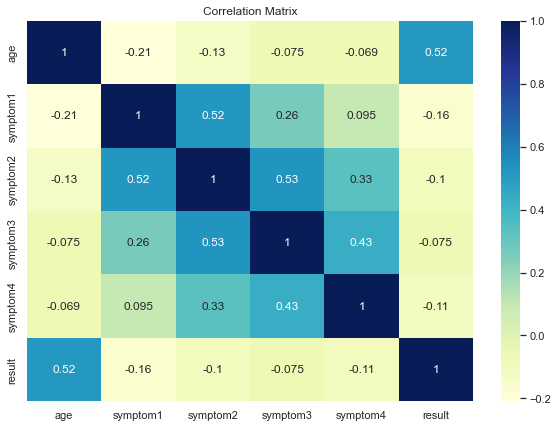

In [35]:
plt.rcParams["figure.figsize"] = (10,7) # Custom figure size in inches
data_Corr=data[['age','symptom1','symptom2','symptom3','symptom4','result']]
sns.heatmap(data_Corr.corr(), annot =True,cmap="YlGnBu")
plt.title('Correlation Matrix')

## This figure highlights:-
-  we noticed that the symptoms are highly correlated with each others.
- Although other features may have non linear correlation, Age and diff_sym has the highest correlation with the results.

#### so far these are the most direct features that we want to investigate further .

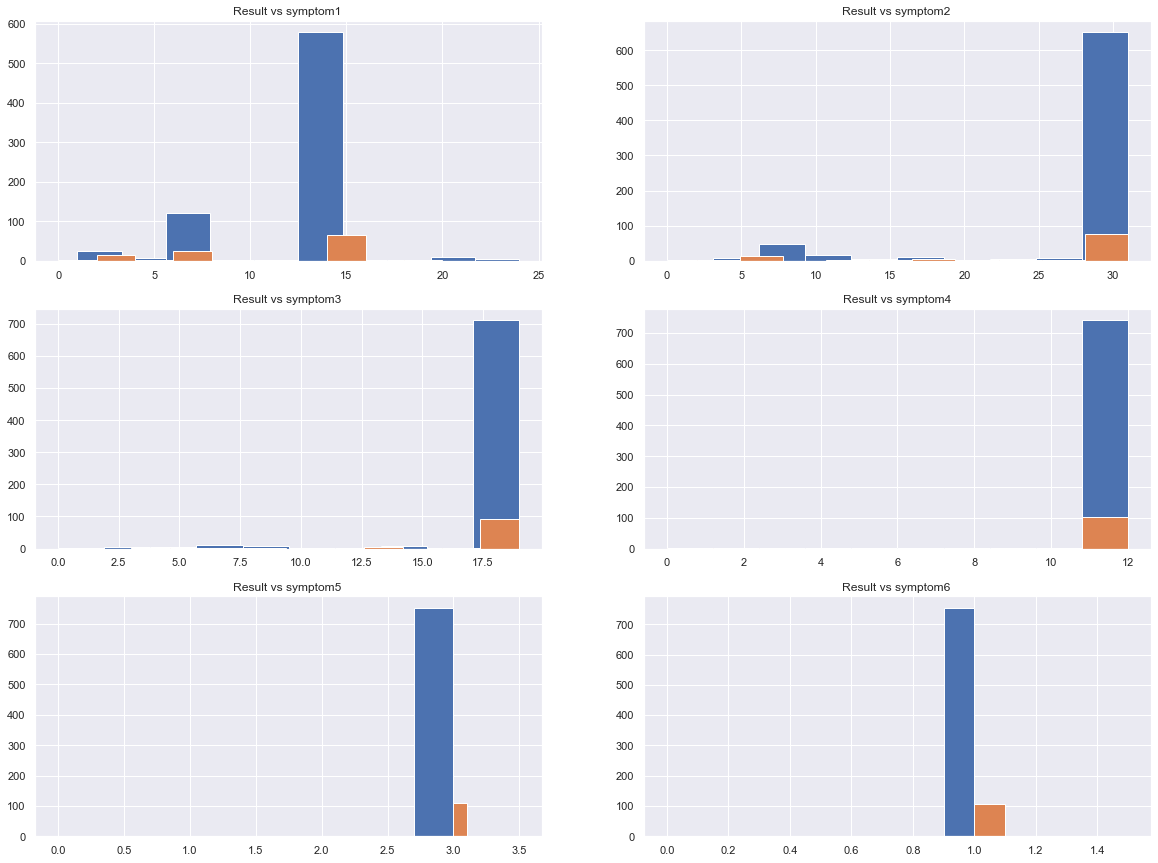

In [36]:
plt.rcParams["figure.figsize"] = (20,15) # Custom figure size in inches
plt.subplot(3,2,1)
data.groupby('result').symptom1.hist();
plt.title('Result vs symptom1 ')
plt.subplot(3,2,2)
data.groupby('result').symptom2.hist();
plt.title('Result vs symptom2 ')
plt.subplot(3,2,3)
data.groupby('result').symptom3.hist();
plt.title('Result vs symptom3 ')
plt.subplot(3,2,4)
data.groupby('result').symptom4.hist();
plt.title('Result vs symptom4')
plt.subplot(3,2,5)
data.groupby('result').symptom5.hist();
plt.title('Result vs symptom5 ')
plt.subplot(3,2,6)
data.groupby('result').symptom6.hist();
plt.title('Result vs symptom6 ');

### We can see  that the values for both recovered and dead patients are concentrated at certain values in all symptoms almost identically associated.
### all symptoms peaks at a certain value , which means we should emphasize the importance of these values by feeding these values as categories and ignore the order of the value  

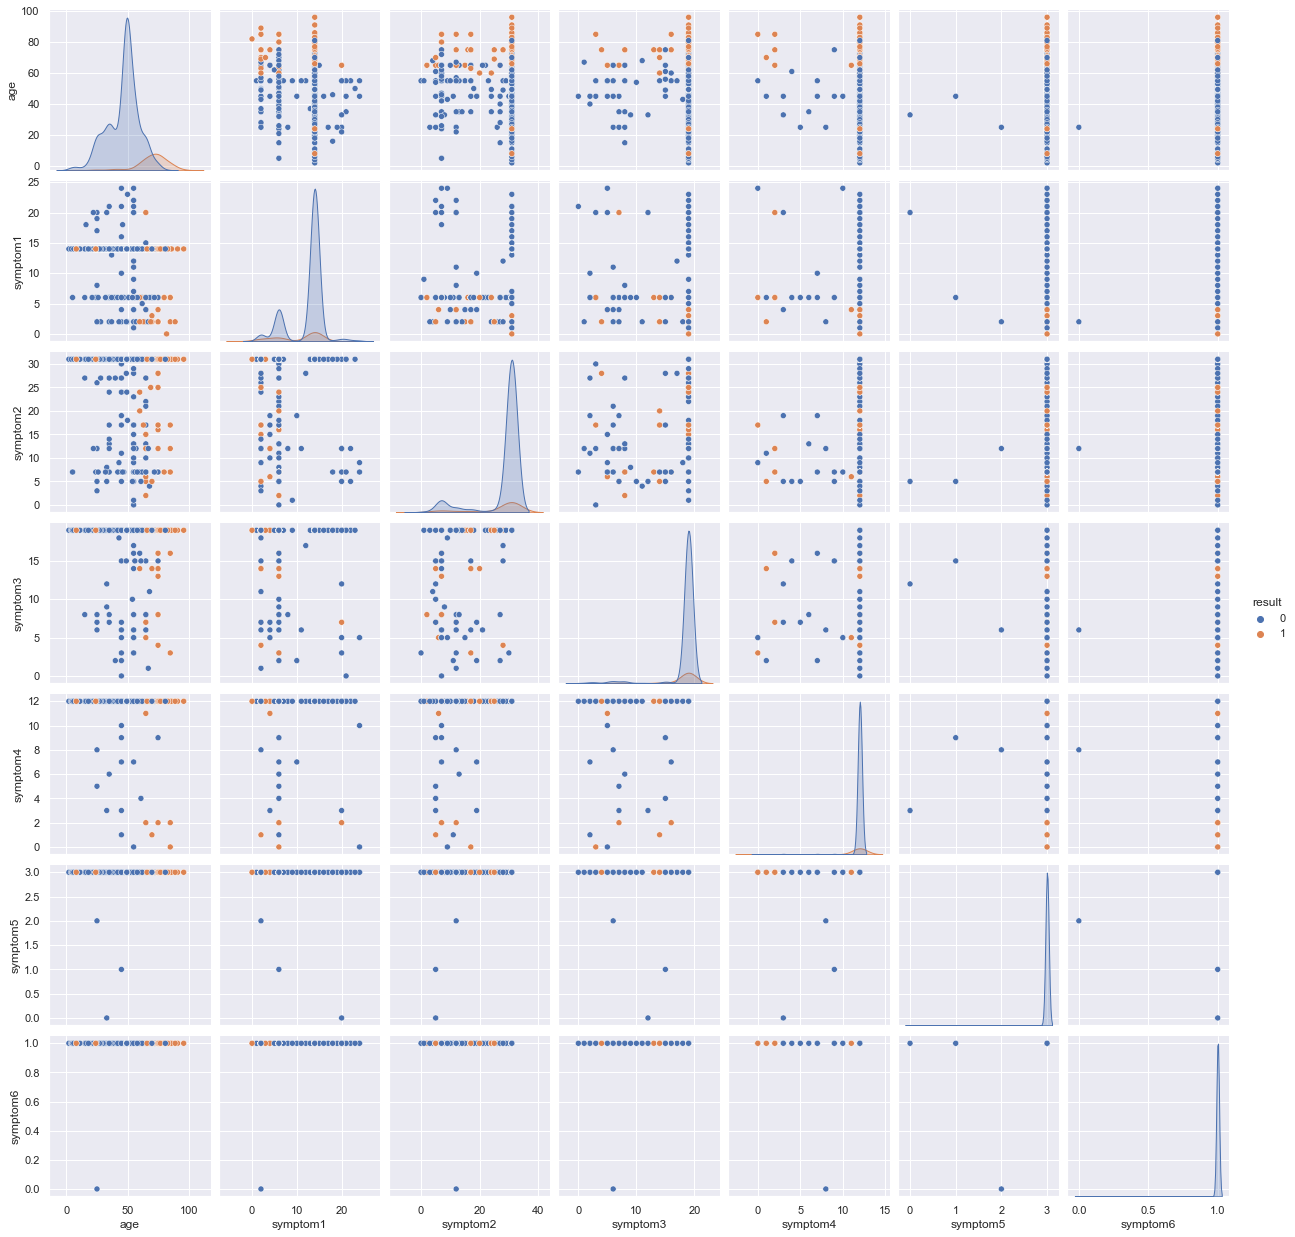

In [37]:
data_Corr2=data[['age','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','result']]

sns.pairplot(data=data_Corr2,hue='result')

Text(0.5, 1.0, 'Result vs Age')

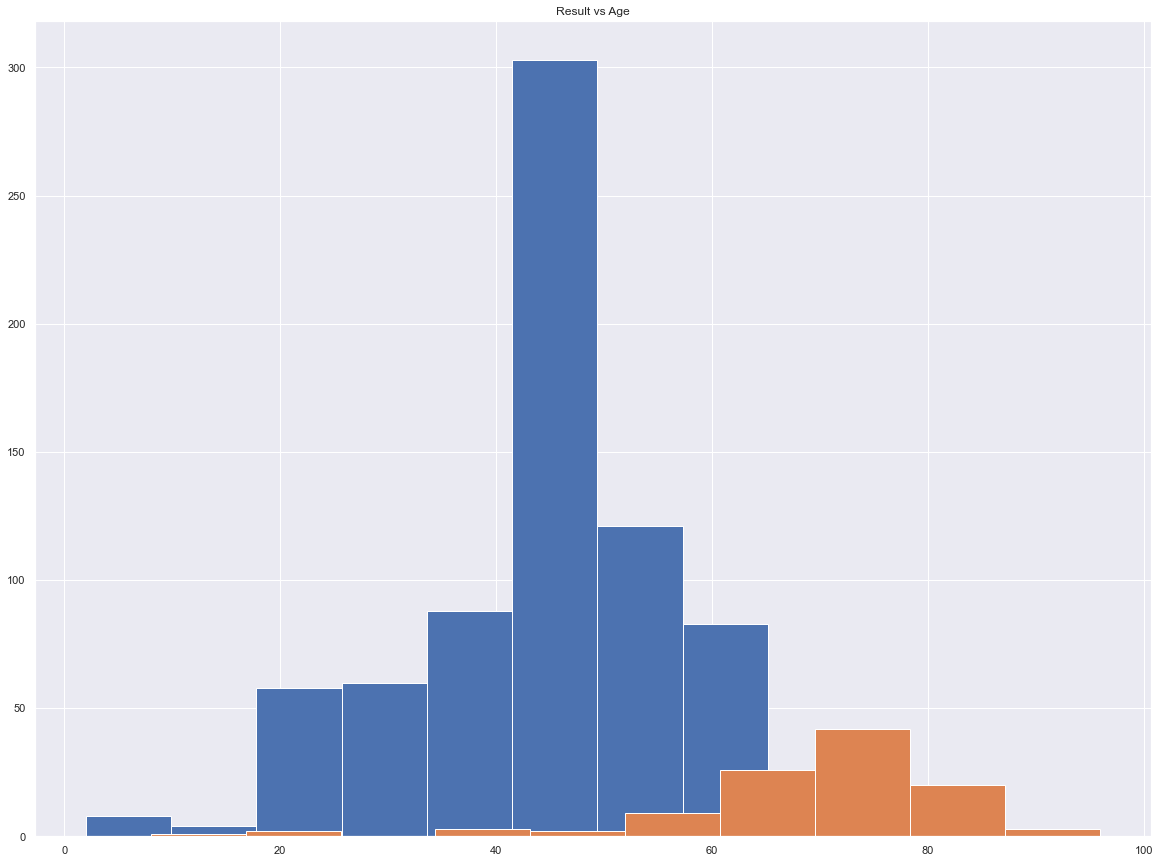

In [38]:
data.groupby('result').age.hist();
plt.title('Result vs Age')

                          Now we are certain that 'Age' is a key feature for predicting the results. 

# 5- preprocessing Features


### 5.1                              by Applying one-hot encoding

In [39]:
features = ['location', 'country', 'gender','vis_wuhan',
            'from_wuhan','symptom1','symptom2', 'symptom3',
            'symptom4','symptom5', 'symptom6']

In [40]:
for col in range(len(features)):
    # Age features are numeric
    count = data[features[col]].unique() # printing unique values of each column
    print("number of unique values in %s ="%features[col],len(count))

number of unique values in location = 139
number of unique values in country = 34
number of unique values in gender = 3
number of unique values in vis_wuhan = 2
number of unique values in from_wuhan = 2
number of unique values in symptom1 = 25
number of unique values in symptom2 = 32
number of unique values in symptom3 = 20
number of unique values in symptom4 = 13
number of unique values in symptom5 = 4
number of unique values in symptom6 = 2


In [41]:
dummy_Dataframe = pd.DataFrame()

for column in range(len(features)):
    dummy_Df = pd.get_dummies(data[features[column]],prefix=features[column])
    dummy_Dataframe = pd.concat([dummy_Dataframe,dummy_Df],axis=1)

In [42]:
data_new = data.drop(columns=features)
data_new=pd.concat([dummy_Dataframe,data_new], axis=1 )
data_new

,location_0,location_1,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,symptom4_12,symptom5_0,symptom5_1,symptom5_2,symptom5_3,symptom6_0,symptom6_1,age,diff_sym_hos,result
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,66.0,8,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,56.0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,46.0,13,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,60.0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,58.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,24.0,0,1
859,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,35.0,0,0
860,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,49.4,0,0
861,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,49.4,0,0


# 5.2 Training and Testing  Split.

In [43]:
X=data_new.iloc[:,:-1]

In [44]:
print('The percentage of the death cases in Data =  %f'%(data_new[['result']].value_counts()[1]/(data_new[['result']].value_counts()[1]+data_new[['result']].value_counts()[0])))
print('The percentage of the recovered cases in Data =  %f'%(data_new[['result']].value_counts()[0]/(data_new[['result']].value_counts()[1]+data_new[['result']].value_counts()[0])))


The percentage of the death cases in Data =  0.125145
The percentage of the recovered cases in Data =  0.874855


In [45]:
y= data_new[['result']]

# In the first step we will split the data in training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, train_size=0.7)


In [46]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print("The sum of Train and Test = ",X_train.shape[0]+X_test.shape[0]) 

(604, 278)
(604, 1)
(259, 278)
(259, 1)
The sum of Train and Test =  863


# ploting curves

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from time import time
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [48]:
                  ## linear regression parameters  
LR_parameters = [{'penalty':['l1','l2']}, 
                 {'C':[1,1e2, 1e3,1e5]},  
                 {'max_iter':[100,1000,10000]}]
                  ## SVC parameters  
SVC_parameters = [{"gamma": [1, 1e2, 1e3, 1e4] ,
                  "C": [ 100, 1e3, 1e4, 1e5],'kernel': ['linear']}]
                  ## decision tree parameters 
DT_parameters = [{'criterion' : ['gini', 'entropy'],
                 'max_depth' : [2,4,6,8]}]
                  ## Naive bayes  parameters 
NB_parameters = [{'var_smoothing': np.logspace(0,-9, num=100)},
                 {'priors': [0.2, 0.8]}]
                   ## KNN  parameters 
                 
KNN_parameters =[{'n_neighbors':np.arange(1,5),  'weights':['uniform','distance'],
             'metric':['euclidean','manhattan'],
             'p':[1,2]
            }]              
    
              

In [49]:
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
    'parameters' : LR_parameters ,
},
{
    'label': 'SVM',
    'model': SVC(probability=True),
    'parameters' : SVC_parameters,
},
{
    'label': 'Decision tree',
    'model': DecisionTreeClassifier(),
    'parameters' : DT_parameters
},
{
    'label': 'Naive bayes',
    'model':  GaussianNB(),
    'parameters' : NB_parameters
},
{
    'label': 'KNN',
    'model':  KNeighborsClassifier(),
    'parameters' : KNN_parameters,
}
]


classification report for LogisticRegression() 
 with best parameters{'C': 100.0} 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       227
           1       0.83      0.78      0.81        32

    accuracy                           0.95       259
   macro avg       0.90      0.88      0.89       259
weighted avg       0.95      0.95      0.95       259

classification report for SVC(probability=True) 
 with best parameters{'C': 1000.0, 'gamma': 1, 'kernel': 'linear'} 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       227
           1       0.77      0.94      0.85        32

    accuracy                           0.96       259
   macro avg       0.88      0.95      0.91       259
weighted avg       0.96      0.96      0.96       259

classification report for DecisionTreeClassifier() 
 with best parameters{'criterion': 'entropy', 'max_depth': 6} 
              precision    reca

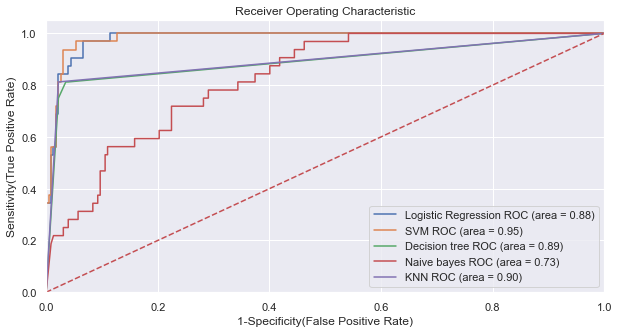

Seconds  42.011455059051514


In [57]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
import sklearn.metrics as metrics

import time
seconds = time.time()

precision=[]
recall=[]
f1=[]
best_para=[]
model_name=[]
# Below for loop iterates through your models list
for m in models:
    # select the model
    grid_search = GridSearchCV(estimator =  m['model'],  
                               param_grid = m['parameters'],
                               scoring = 'recall',
                               cv = 10,
                               verbose=0)
      
    grid_search.fit(X_train, np.ravel(y_train)) # train the model
    y_pred= grid_search.predict(X_test)

    print('classification report for {} \n with best parameters{} '.format(m['model'], grid_search.best_params_))
    
    print(classification_report(y_test,y_pred))
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_search.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,y_pred)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Now, calulate the precision and recall and f1-score .    
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    f1.append(f1_score(y_test,y_pred))
    model_name.append(m['label'])
    best_para.append(grid_search.best_params_)

# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()  

seconds2 = time.time()
print("Seconds ", seconds2-seconds)


In [51]:
# TODO
# Make dataframe with modelnames and threir metrics
pd.set_option('display.max_colwidth', None)
print ('train test split ratio = 0.7, metric = recall')
model_name   # 5 models
Models=pd.DataFrame(list(zip(model_name,precision,recall,f1,best_para)),
                    columns=['Model_name','Precision','Recall','F1','best parameters'])

Models   #dataframe with Model names and their metrics 


train test split ratio = 0.7, metric = recall


,Model_name,Precision,Recall,F1,best parameters
0,Logistic Regression,0.833333,0.78125,0.806452,{'C': 100.0}
1,SVM,0.769231,0.93750,0.845070,"{'C': 1000.0, 'gamma': 1, 'kernel': 'linear'}"
2,Decision tree,0.764706,0.81250,0.787879,"{'criterion': 'entropy', 'max_depth': 6}"
3,Naive bayes,0.250000,0.78125,0.378788,{'var_smoothing': 6.579332246575683e-05}
4,KNN,0.838710,0.81250,0.825397,"{'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}"


<AxesSubplot:xlabel='Model_name'>

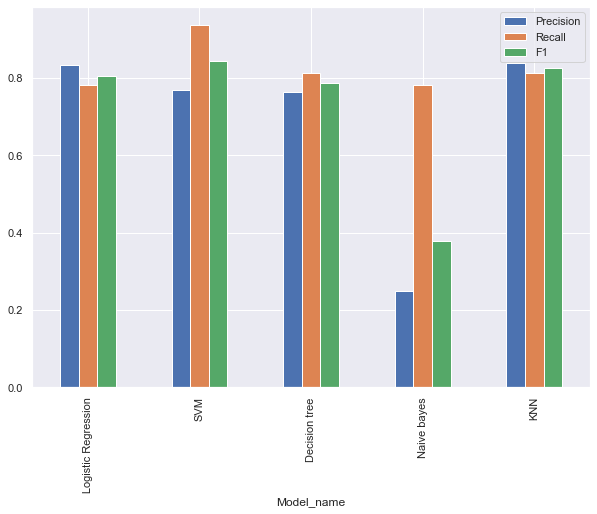

In [52]:
Models.plot(x='Model_name',kind="bar",figsize=(10,7))

## It is clear that the best model is ((((((   SVM ))))))))  When we Run on Jupyter, But Magically on Google Colab it is different and similar to PDF Report .
### This is probably due to cross validation 
### this can be solved by using stratify Kfold but we weren't allowed to use it with the permission of Prof/Hazem

# Plotting Decision Tree Model

In [53]:
#with best parameters
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(criterion='entropy',max_depth = 8)
model = clf.fit(X_train, y_train)



In [54]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_276 <= 59.50
|   |--- feature_141 <= 0.50
|   |   |--- feature_142 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_142 >  0.50
|   |   |   |--- class: 1
|   |--- feature_141 >  0.50
|   |   |--- feature_277 <= 2.00
|   |   |   |--- class: 1
|   |   |--- feature_277 >  2.00
|   |   |   |--- class: 0
|--- feature_276 >  59.50
|   |--- feature_276 <= 73.50
|   |   |--- feature_277 <= 1.50
|   |   |   |--- feature_179 <= 0.50
|   |   |   |   |--- feature_276 <= 65.50
|   |   |   |   |   |--- feature_125 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_125 >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_276 >  65.50
|   |   |   |   |   |--- feature_173 <= 0.50
|   |   |   |   |   |   |--- feature_176 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_176 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_173 >  0.50
|   |   |   |   |   |   |--- cla

In [55]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)


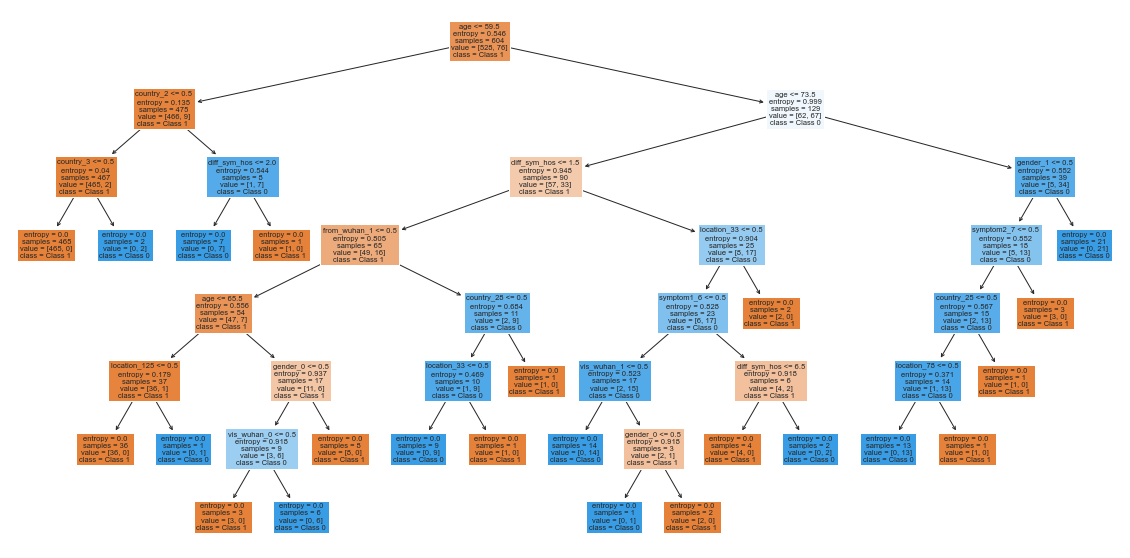

In [56]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf,feature_names=list(X_train.columns),  
                   class_names=['Class 1 ','Class 0'],
                   filled=True)
fig.savefig("decistion_tree.png")


------------------------------------------------------------------------
************************************************************************
------------------------------------------------------------------------



#  This is the end of our code,,,,, But these are the efforts of our work
##### Previous effort before assembling the model , each model trained sperately, we found it more convinient to merge all the models in one training loop
##### We prefered not removing them.


------------------------------------------------------------------------
************************************************************************
------------------------------------------------------------------------


In [ ]:
cm_Test = confusion_matrix(y_test,y_pred)

print('Confusion matrix\n\n', cm_Test)

print('\nTrue Negatives(TN) = ', cm_Test[0,0])

print('\nTrue Positives(TP) = ', cm_Test[1,1])

print('\nFalse Positives(FP) = ', cm_Test[0,1])

print('\nFalse Negatives(FN) = ', cm_Test[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap
fig = plt.figure(figsize=(7,5))

cm_matrix_Test = pd.DataFrame(data=cm_Test, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix_Test, annot=True, fmt='d', cmap='YlGnBu')

## Classification Report

In [ ]:
print(classification_report(y_test,y_pred_RT_test))

## ROC

In [ ]:
scores = cross_val_score(Clf_tree, X_train, y_train, cv =10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

###### clear improvement appeared that after cross validation enhanced the Accuracy from 94.2% to almost 96.5%

# Hyperparameter Optimization using GridSearch CV

In [112]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


std_slc = StandardScaler()

dec_tree = tree.DecisionTreeClassifier(criterion= 'entropy')


tuning centroid and tree depth 

In [ ]:
# print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
# print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
# print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
# print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

# Logistic Regression Model

In [108]:
#Create the model
# instantiate the model
Clf_logreg = LogisticRegression(solver='liblinear',C=100, random_state=0)

# fit the model
Clf_logreg.fit(X_train, np.ravel(y_train))
Clf_logreg

LogisticRegression(C=100, random_state=0, solver='liblinear')

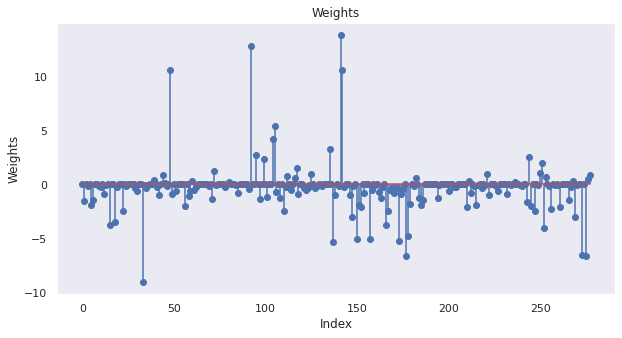

In [109]:
# TODO
W =Clf_logreg.coef_.reshape(-1,1)          #get coeffeicnts of model
plt.figure(figsize=(10,5))                
plt.stem(W,use_line_collection=True);
plt.xlabel('Index')
plt.ylabel('Weights')
plt.title('Weights')
plt.grid()

In [ ]:
# y_pred_train=Clf.predict(X_train)

y_pred_test = Clf_logreg.predict(X_test)

y_pred_test

## Check Performance

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score

Accuracy=accuracy_score(y_test,y_pred_test) #measzure the accuracy of the model
print("Accuracy:  " , (Accuracy))

In [ ]:
#Another way Accuracy

np.mean(y_pred_test==np.ravel(y_test))

## Confusion Matrix for log_reg

In [ ]:
cm_Test = confusion_matrix(y_test,y_pred_test)
print('Confusion matrix\n\n', cm_Test)
print('\nTrue Negatives(TN) = ', cm_Test[0,0])
print('\nTrue Positives(TP) = ', cm_Test[1,1])
print('\nFalse Positives(FP) = ', cm_Test[0,1])
print('\nFalse Negatives(FN) = ', cm_Test[1,0])

In [ ]:
print(classification_report(y_test,y_pred_test))

In [ ]:
# visualize confusion matrix with seaborn heatmap
fig = plt.figure(figsize=(7,5))
cm_matrix_Test = pd.DataFrame(data=cm_Test, columns=['Actual Negative:0', 'Actual Positive:1'], 
                                 index=['Predict Negative:0', 'Predict Positive:1'])
sns.heatmap(cm_matrix_Test, annot=True, fmt='d', cmap='YlGnBu')

## ROC 

In [ ]:
scores = cross_val_score(Clf_logreg, X_train, np.ravel(y_train), cv =10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

# Optimizing log_reg using GridSearch CV

In [ ]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


std_slc = StandardScaler()
pca = decomposition.PCA()
Log_Reg =LogisticRegression(solver='liblinear', random_state=0)
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('Log_Reg', Log_Reg)])


In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

In [ ]:
LR_parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

this model is taking forever we searched for another method for searching for the best parameters with less time 